# Masking a bacterial colony

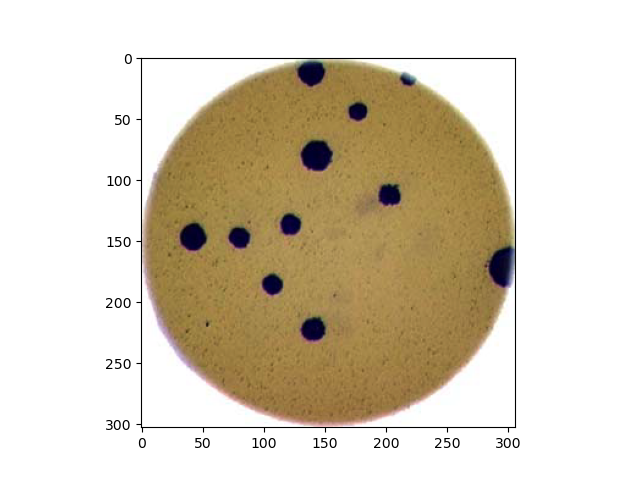

In [1]:
import glob

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget
colonies = iio.imread(uri="../data/raw/training/colonies-01.tif")
fig, ax = plt.subplots()
ax.imshow(colonies)


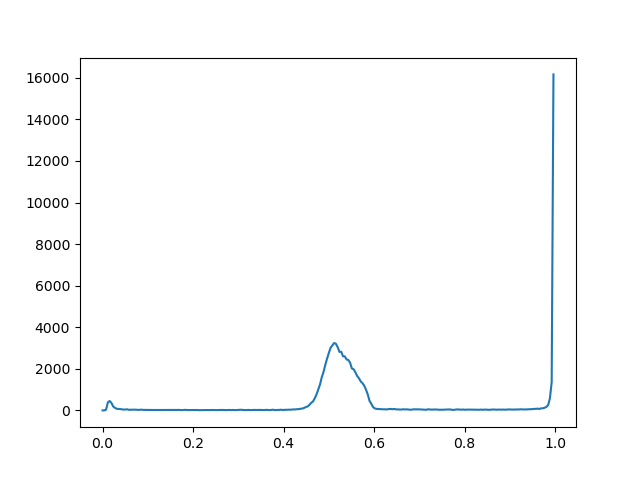

In [2]:
# convert the image to grayscale
gray_image = ski.color.rgb2gray(colonies)

# blur the image to de-noise
blurred_image = ski.filters.gaussian(gray_image, sigma=1.0)

histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
ax.plot(bin_edges[:-1], histogram)

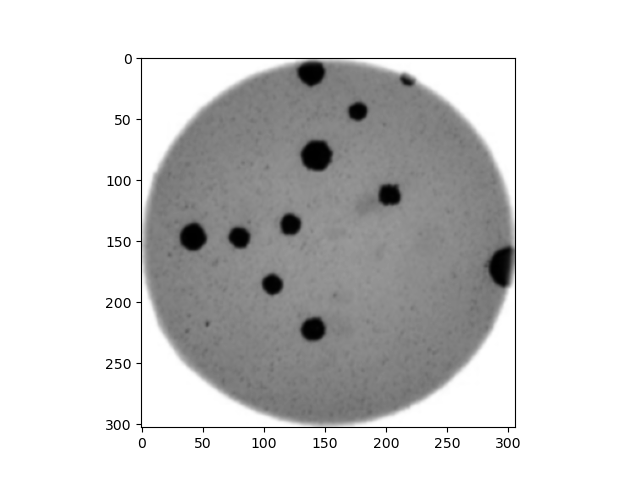

In [3]:
gray_shapes = ski.color.rgb2gray(colonies)

blurred_shapes = ski.filters.gaussian(gray_shapes, sigma=1.0)
fig, ax = plt.subplots()
ax.imshow(blurred_shapes, cmap="gray")

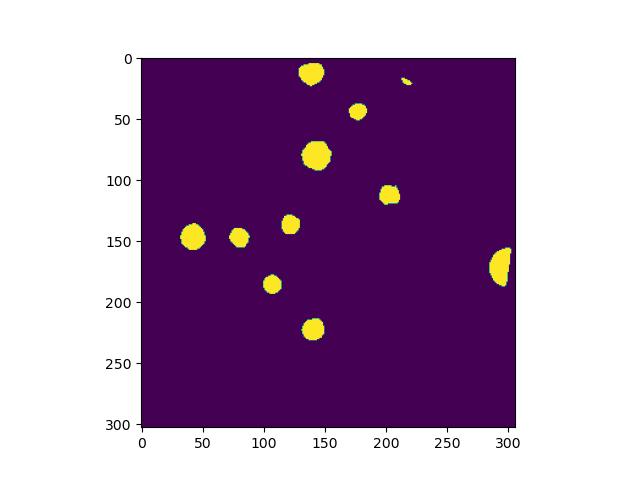

In [4]:
t = 0.2
binary_mask = blurred_shapes < t

fig, ax = plt.subplots()
ax.imshow(binary_mask)

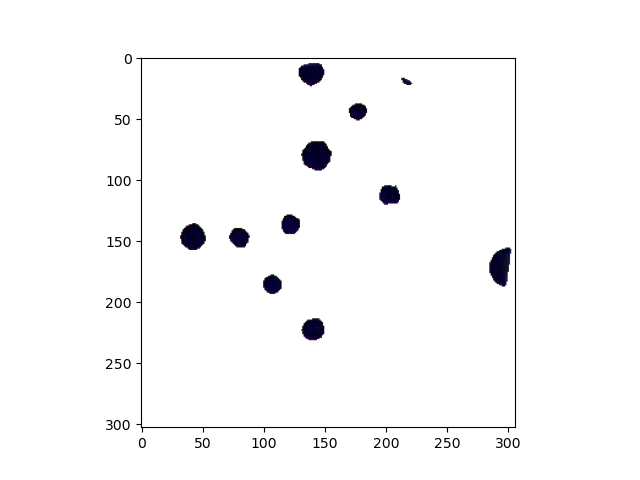

In [5]:
selection = colonies.copy()
selection[~binary_mask] = 255  # because the image is colour not grayscale

fig, ax = plt.subplots()
ax.imshow(selection, cmap="gray")